In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
# Load dataset (replace with your file path)
df = pd.read_csv("C:/Users/teste/Downloads/supply_chain_data (1).csv")  

In [11]:
# Display first few rows
print("📊 Dataset Overview:")
display(df.head())

📊 Dataset Overview:


,Inventory Level,Lead Time (Days),Transport Cost ($),Past Monthly Sales,Demand
0,502,9,278,1303,1275
1,579,7,270,1403,1138
2,492,3,176,1383,1576
3,414,3,270,1391,1269
4,506,9,265,1134,1346


In [12]:
# Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Missing Values:
Inventory Level       0
Lead Time (Days)      0
Transport Cost ($)    0
Past Monthly Sales    0
Demand                0
dtype: int64


In [13]:
# Define features (X) and target (y)
target_column = "Demand"  # Change if your target variable has a different name
features = df.drop(columns=[target_column])
labels = df[target_column]

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [15]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [21]:
print("\n📈 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


📈 Model Performance:
Mean Absolute Error (MAE): 121.52
Root Mean Squared Error (RMSE): 150.41


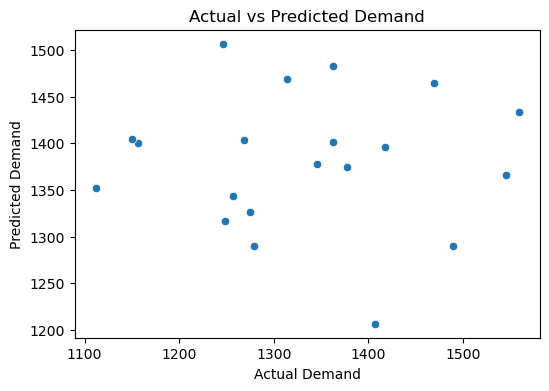

In [22]:
# Visualization - Actual vs Predicted Demand
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.show()

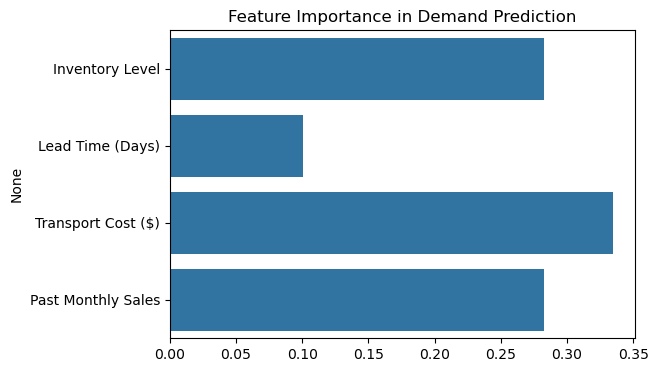

In [24]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance in Demand Prediction")
plt.show()

In [ ]:
# User Input for Prediction
print("\n🔮 Predict Future Demand")
user_input = {}
for col in features.columns:
    user_input[col] = float(input(f"Enter value for {col}: "))

user_df = pd.DataFrame([user_input])
prediction = model.predict(user_df)

print(f"\n📊 Predicted Demand: {prediction[0]:.2f}")


🔮 Predict Future Demand
